In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import re
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount("/content/drive")

# dataset location
base_path = "/content/drive/Shareddrives/NLP Fall 2023/Dataset/"

# mapping logic function to normalize header into [introduction, method, result, conslusion]
def normalize_header(header):
  header = str(header).lower()
  if bool(re.search(r'introduction|background|related? work?', header)):
    return "introduction"
  if bool(re.search(r'experiment|evaluat|result', header)):
    return "result"
  if bool(re.search(r'method|solution', header)):
    return "method"
  if bool(re.search(r'conclusion|discussion|summar|conclud', header)):
    return "conclusion"

  if bool(re.search(r'overview|problem|motivation|prelim', header)):
    return "introduction"
  return "other"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset schema exploration

In [2]:
dataset = pd.read_json(base_path + 'filter/dataset_1.json')
dataset

,corpusid,externalids,content
0,13292366,"{'arxiv': '1609.04186', 'mag': '2962834107', '...",{'source': {'pdfurls': ['https://www.aclweb.or...
1,20527197,"{'arxiv': '1705.06821', 'mag': '2982426383', '...",{'source': {'pdfurls': ['https://arxiv.org/pdf...
2,116505,"{'arxiv': '1711.02536', 'mag': '2963233928', '...",{'source': {'pdfurls': ['https://arxiv.org/pdf...
3,4693065,"{'arxiv': '1804.02199', 'mag': '2963695770', '...",{'source': {'pdfurls': ['https://arxiv.org/pdf...
4,85498398,"{'arxiv': '1903.10195', 'mag': '2961568745', '...",{'source': {'pdfurls': ['https://arxiv.org/pdf...
...,...,...,...
5851,244918896,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...","{'source': {'pdfurls': None, 'pdfsha': '43d177..."
5852,246649327,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...","{'source': {'pdfurls': None, 'pdfsha': 'e0dd44..."
5853,225830257,"{'arxiv': None, 'mag': '3043116244', 'acl': No...","{'source': {'pdfurls': None, 'pdfsha': '9fda88..."
5854,202772449,"{'arxiv': None, 'mag': '2972235673', 'acl': No...",{'source': {'pdfurls': ['https://web.archive.o...


In [3]:
idx = 0
dataset['externalids'][idx]

{'arxiv': '1609.04186',
 'mag': '2962834107',
 'acl': 'C16-1291',
 'pubmed': None,
 'pubmedcentral': None,
 'dblp': 'conf/coling/LiuUFS16',
 'doi': None}

In [4]:
dataset['content'][idx]

{'source': {'pdfurls': ['https://www.aclweb.org/anthology/C16-1291.pdf'],
  'pdfsha': '7f12bd8efc6791399abdc587a1ca4f52776e2b88',
  'oainfo': None},
 'text': "\nNeural Machine Translation with Supervised Attention\nDecember 11-17 2016\n\nLemao Liu lmliu@nict.go.jp \nNICT)\nNational Institute of Information and Communications Technology\n3-5 Hikari-dai, Seika-cho, Soraku-gunKyotoJapan\n\nMasao Utiyama \nNICT)\nNational Institute of Information and Communications Technology\n3-5 Hikari-dai, Seika-cho, Soraku-gunKyotoJapan\n\nAndrew Finch \nNICT)\nNational Institute of Information and Communications Technology\n3-5 Hikari-dai, Seika-cho, Soraku-gunKyotoJapan\n\nEiichiro Sumita \nNICT)\nNational Institute of Information and Communications Technology\n3-5 Hikari-dai, Seika-cho, Soraku-gunKyotoJapan\n\nNeural Machine Translation with Supervised Attention\n\nProceedings of COLING 2016, the 26th International Conference on Computational Linguistics: Technical Papers\nCOLING 2016, the 26th Inte

In [5]:
# idx = 0
paper = pd.DataFrame(dataset['content'][idx])
paper

,source,text,annotations
pdfurls,[https://www.aclweb.org/anthology/C16-1291.pdf],\nNeural Machine Translation with Supervised A...,NaN
pdfsha,7f12bd8efc6791399abdc587a1ca4f52776e2b88,\nNeural Machine Translation with Supervised A...,NaN
oainfo,None,\nNeural Machine Translation with Supervised A...,NaN
abstract,NaN,\nNeural Machine Translation with Supervised A...,"[{""end"":1918,""start"":913}]"
author,NaN,\nNeural Machine Translation with Supervised A...,"[{""end"":221,""start"":75},{""end"":355,""start"":222..."
authoraffiliation,NaN,\nNeural Machine Translation with Supervised A...,"[{""end"":220,""start"":103},{""end"":354,""start"":23..."
authorfirstname,NaN,\nNeural Machine Translation with Supervised A...,"[{""end"":80,""start"":75},{""end"":227,""start"":222}..."
authorlastname,NaN,\nNeural Machine Translation with Supervised A...,"[{""end"":84,""start"":81},{""end"":235,""start"":228}..."
bibauthor,NaN,\nNeural Machine Translation with Supervised A...,"[{""end"":28307,""start"":28292},{""end"":28322,""sta..."
bibauthorfirstname,NaN,\nNeural Machine Translation with Supervised A...,"[{""end"":28298,""start"":28292},{""end"":28313,""sta..."


In [6]:
# title
paper['text'][idx][1:53]

'Neural Machine Translation with Supervised Attention'

In [7]:
# abstract
paper['text'][idx][913:1918]

'The attention mechanism is appealing for neural machine translation, since it is able to dynamically encode a source sentence by generating a alignment between a target word and source words. Unfortunately, it has been proved to be worse than conventional alignment models in alignment accuracy. In this paper, we analyze and explain this issue from the point view of reordering, and propose a supervised attention which is learned with guidance from conventional alignment models. Experiments on two Chinese-to-English translation tasks show that the supervised attention mechanism yields better alignments leading to substantial gains over the standard attention based NMT.This work is licensed under a Creative Commons Attribution 4.0 International Licence.Licence details: http://creativecommons.org/licenses/by/4.0/ 1 Throughout this paper, without the special statement, NMT means attention-based NMT. 2  We do agree that NMT is a supervised model with respect to translation rather than reord

In [8]:
# section header with annotation start and end index of full text
paper['annotations']['sectionheader']

'[{"attributes":{"n":"1"},"end":1932,"start":1920},{"attributes":{"n":"2"},"end":6789,"start":6752},{"attributes":{"n":"3"},"end":9880,"start":9860},{"attributes":{"n":"3.1"},"end":10426,"start":10391},{"attributes":{"n":"3.2"},"end":11594,"start":11549},{"attributes":{"n":"4"},"end":13494,"start":13483},{"attributes":{"n":"4.1.2"},"end":16083,"start":16052},{"attributes":{"n":"4.1.3"},"end":17996,"start":17957},{"attributes":{"n":"4.1.4"},"end":18032,"start":17999},{"attributes":{"n":"4.2"},"end":21383,"start":21339},{"attributes":{"n":"5"},"end":23132,"start":23120},{"attributes":{"n":"6"},"end":25797,"start":25787},{"end":26424,"start":26414},{"end":26762,"start":26752},{"end":26834,"start":26824}]'

In [9]:
# get header from full text
for header in eval(paper['annotations']['sectionheader']):
  print(header, '\t\t', paper['text'][0][header['start']:header['end']])

{'attributes': {'n': '1'}, 'end': 1932, 'start': 1920} 		 Introduction
{'attributes': {'n': '2'}, 'end': 6789, 'start': 6752} 		 Revisiting Neural Machine Translation
{'attributes': {'n': '3'}, 'end': 9880, 'start': 9860} 		 Supervised Attention
{'attributes': {'n': '3.1'}, 'end': 10426, 'start': 10391} 		 Preprocessing Alignment Supervision
{'attributes': {'n': '3.2'}, 'end': 11594, 'start': 11549} 		 Jointly Supervising Translation and Attention
{'attributes': {'n': '4'}, 'end': 13494, 'start': 13483} 		 Experiments
{'attributes': {'n': '4.1.2'}, 'end': 16083, 'start': 16052} 		 Settings on External Alignments
{'attributes': {'n': '4.1.3'}, 'end': 17996, 'start': 17957} 		 Results on Large Scale Translation Task
{'attributes': {'n': '4.1.4'}, 'end': 18032, 'start': 17999} 		 Results and Analysis on Alignment
{'attributes': {'n': '4.2'}, 'end': 21383, 'start': 21339} 		 Results on the Low Resource Translation Task
{'attributes': {'n': '5'}, 'end': 23132, 'start': 23120} 		 Related Wor

In [10]:
# get paragraph content from full text
for paragraph in eval(paper['annotations']['paragraph']):
  print(paragraph, '\t\t', paper['text'][0][paragraph['start']:paragraph['end']])

{'end': 2712, 'start': 1934} 		 Neural Machine Translation (NMT) has achieved great successes on machine translation tasks recently (Bahdanau et al., 2015;Sutskever et al., 2015). Generally, it relies on a recurrent neural network under the Encode-Decode framework: it firstly encodes a source sentence into context vectors and then generates its translation token-by-token, selecting from the target vocabulary. Among different variants of NMT, attention based NMT, which is the focus of this paper, 1 is attracting increasing interests in the community (Bahdanau et al., 2015;. One of its advantages is that it is able to dynamically make use of the encoded context through an attention mechanism thereby allowing the use of fewer hidden layers while still maintaining high levels of translation performance.
{'end': 3955, 'start': 2714} 		 An attention mechanism is designed to predict the alignment of a target word with respect to source words (Bahdanau et al., 2015). In order to facilitate inc

### Get title, abstract, list of headers each paper all dataset

In [11]:
# full loop all dataset
df_list = []
for i in tqdm(range(1,31)):
  dataset = pd.read_json(base_path + 'filter/dataset_'+str(i)+'.json')

  # loop each paper
  for idx,row in dataset.iterrows():
    content_dict = {}
    corpusid = row['corpusid']
    content = row['content']
    content_annotation = content['annotations']
    content_text = content['text']

    try:
      # get index from annotation
      # note: title and abstract from direct api are more accurate than full text annotation
      try:
        title_idx = eval(content_annotation['title'])[0]
        abstract_idx = eval(content_annotation['abstract'])[0]
      except:
        title_idx = False
        abstract_idx = False

      section_idx = eval(content_annotation['sectionheader'])

      # get content from text by slicing index
      title = content_text[title_idx['start']:title_idx['end']] if title_idx != False else None
      abstract = content_text[abstract_idx['start']:abstract_idx['end']] if abstract_idx != False else None
      section_list = [content_text[s['start']:s['end']] for s in section_idx ]
      section_dict = [{'raw_header': content_text[s['start']:s['end']],
                  'normalize_header': normalize_header(content_text[s['start']:s['end']]),
                  'start': s['start'],
                  'end': s['end']
                 }
                 for s in section_idx]

      # update dict
      content_dict.update({'datasetId': i,
                          'corpusId': corpusid,
                          'title': title,
                          'abstract': abstract,
                          'sectionHeaderList': section_list,
                          'sectionHeaderDict': section_dict
                          })
      df_list.append(content_dict)

    except Exception as e:
      # print(idx, corpusid, e)

      # update dict
      content_dict.update({'datasetId': i,
                          'corpusId': corpusid,
                          'title': None,
                          'abstract': None,
                          'sectionHeaderList': [],
                          'sectionHeaderDict': []
                          })
      df_list.append(content_dict)

# convert list to dataframe
df = pd.DataFrame(df_list)
df.head()

  0%|          | 0/30 [00:00<?, ?it/s]

,datasetId,corpusId,title,abstract,sectionHeaderList,sectionHeaderDict
0,1,13292366,Neural Machine Translation with Supervised Att...,The attention mechanism is appealing for neura...,"[Introduction, Revisiting Neural Machine Trans...","[{'raw_header': 'Introduction', 'normalize_hea..."
1,1,20527197,Spatial Variational Auto-Encoding via Matrix-V...,The key idea of variational auto-encoders (VAE...,"[Introduction, Background and Related Work, Au...","[{'raw_header': 'Introduction', 'normalize_hea..."
2,1,116505,Few-Shot Adversarial Domain Adaptation,This work provides a framework for addressing ...,"[Introduction, Related work, Few-shot adversar...","[{'raw_header': 'Introduction', 'normalize_hea..."
3,1,4693065,Mix and match networks: encoder-decoder alignm...,We address the problem of image translation be...,"[Introduction, Train, Related Work, .1. Multi-...","[{'raw_header': 'Introduction', 'normalize_hea..."
4,1,85498398,None,None,"[INTRODUCTION, RELATED WORKS, Real/Fake, YOUTU...","[{'raw_header': 'INTRODUCTION', 'normalize_hea..."


In [12]:
# deduplicate sectionHeaderList
dedup = []
for original_list in df['sectionHeaderList']:
  seen_list = set()
  deduplicated_list = [d for d in original_list if not (d in seen_list or seen_list.add(d))]
  dedup.append(deduplicated_list)
df['sectionHeaderList'] = dedup

In [13]:
# deduplicate sectionHeaderDict
dedup = []
for original_list in df['sectionHeaderDict']:
  # print(original_list)
  seen_entries = set()
  deduplicated_list = [d for d in original_list if not (tuple(d.items()) in seen_entries or seen_entries.add(tuple(d.items())))]
  dedup.append(deduplicated_list)
df['sectionHeaderDict'] = dedup

In [14]:
# write result to file
df.to_csv(base_path + "filtered_corpusid_content.csv", index=False)

### Get text of each focused header all dataset
(introduction, method, result and conclusion)

In [15]:
df = pd.read_csv(base_path + "filtered_corpusid_content.csv")
df.head()

,datasetId,corpusId,title,abstract,sectionHeaderList,sectionHeaderDict
0,1,13292366,Neural Machine Translation with Supervised Att...,The attention mechanism is appealing for neura...,"['Introduction', 'Revisiting Neural Machine Tr...","[{'raw_header': 'Introduction', 'normalize_hea..."
1,1,20527197,Spatial Variational Auto-Encoding via Matrix-V...,The key idea of variational auto-encoders (VAE...,"['Introduction', 'Background and Related Work'...","[{'raw_header': 'Introduction', 'normalize_hea..."
2,1,116505,Few-Shot Adversarial Domain Adaptation,This work provides a framework for addressing ...,"['Introduction', 'Related work', 'Few-shot adv...","[{'raw_header': 'Introduction', 'normalize_hea..."
3,1,4693065,Mix and match networks: encoder-decoder alignm...,We address the problem of image translation be...,"['Introduction', 'Train', 'Related Work', '.1....","[{'raw_header': 'Introduction', 'normalize_hea..."
4,1,85498398,NaN,NaN,"['INTRODUCTION', 'RELATED WORKS', 'Real/Fake',...","[{'raw_header': 'INTRODUCTION', 'normalize_hea..."


In [16]:
# full loop all dataset
curr_dataset = 0
dataset_list = []

for i, dataset_id in tqdm(enumerate(df['datasetId']), total=len(df)):
  if dataset_id != curr_dataset:
    print("dataset_"+str(dataset_id)+'.json')
    dataset = pd.read_json(base_path + 'filter/dataset_'+str(dataset_id)+'.json')
    curr_dataset = dataset_id

  # select only current corpusid at row i
  corpus = dataset[dataset['corpusid']==df['corpusId'][i]]
  pdf_url = corpus['content'].values[0]['source']['pdfurls']
  section_header_dict = eval(df['sectionHeaderDict'][i])

  text_dict = {'corpus_id': df['corpusId'][i],
               'pdf_url': None if pdf_url == None else pdf_url[0]}

  try:
    full_text = corpus['content'].values[0]['text']
    paragraph_anno = eval(corpus['content'].values[0]['annotations']['paragraph'])

    # get text of each header
    for j in range(len(section_header_dict)):
      # get index of paragraph corresponding to header (after the end of current header and before the start of next header)
      end_curr_idx = section_header_dict[j]['end']
      try:
        start_next_idx = section_header_dict[j+1]['start']
      except:
        start_next_idx = len(full_text) # max length of full text

      # check if normalize_header is in our focused headers, otherwise ignore it and continue next header
      if section_header_dict[j]['normalize_header'] in ['introduction', 'method', 'result', 'conclusion']:
        text = ""

        for p_anno in paragraph_anno:
          if p_anno['start'] >= end_curr_idx and p_anno['end'] <= start_next_idx:
            text = "\n".join([text, full_text[p_anno['start']:p_anno['end']]]) if text != "" else full_text[p_anno['start']:p_anno['end']]

        # if normalize_header is not in key of dictionary then add new key = normalize_header and value = text, otherwise concat text to existing value
        if section_header_dict[j]['normalize_header'] not in text_dict:
          text_dict[section_header_dict[j]['normalize_header']] = text
        else:
          text_dict[section_header_dict[j]['normalize_header']] += ("\n"+text)

    dataset_list.append(text_dict)
  except Exception as e:
    dataset_list.append(text_dict)


  0%|          | 0/171123 [00:00<?, ?it/s]

dataset_1.json
dataset_2.json
dataset_3.json
dataset_4.json
dataset_5.json
dataset_6.json
dataset_7.json
dataset_8.json
dataset_9.json
dataset_10.json
dataset_11.json
dataset_12.json
dataset_13.json
dataset_14.json
dataset_15.json
dataset_16.json
dataset_17.json
dataset_18.json
dataset_19.json
dataset_20.json
dataset_21.json
dataset_22.json
dataset_23.json
dataset_24.json
dataset_25.json
dataset_26.json
dataset_27.json
dataset_28.json
dataset_29.json
dataset_30.json


In [17]:
# convert dict to dataframe
df_text = pd.DataFrame(dataset_list)
df_text.head()

,corpus_id,pdf_url,introduction,result,conclusion,method
0,13292366,https://www.aclweb.org/anthology/C16-1291.pdf,Neural Machine Translation (NMT) has achieved ...,We conducted experiments on two Chinese-to-Eng...,It has been shown that attention mechanism in ...,NaN
1,20527197,https://arxiv.org/pdf/1705.06821v1.pdf,The mathematical and computational modeling of...,"In this section, we report experimental result...","In this work, we propose spatial VAEs for imag...",NaN
2,116505,https://arxiv.org/pdf/1711.02536v1.pdf,As deep learning approaches have gained promin...,We present results using the Office dataset [4...,We have introduced a deep model combining a cl...,NaN
3,4693065,https://arxiv.org/pdf/1804.02199v1.pdf,Image-to-image translations (or simply image t...,To the best of our knowledge there is no exist...,In this paper we introduce the problem of zero...,We compare the results of our mix and match ne...
4,85498398,https://arxiv.org/pdf/1903.10195v1.pdf,Audio and visual signals are the most common m...,Model training: The Wav2Pix model was trained ...,In this work we introduced a simple yet effect...,Since our goal is to train a GAN conditioned o...


### Merge all dataframes

In [18]:
df_all = pd.merge(df, df_text, left_on="corpusId", right_on="corpus_id", how="left")
df_all.head()

,datasetId,corpusId,title,abstract,sectionHeaderList,sectionHeaderDict,corpus_id,pdf_url,introduction,result,conclusion,method
0,1,13292366,Neural Machine Translation with Supervised Att...,The attention mechanism is appealing for neura...,"['Introduction', 'Revisiting Neural Machine Tr...","[{'raw_header': 'Introduction', 'normalize_hea...",13292366,https://www.aclweb.org/anthology/C16-1291.pdf,Neural Machine Translation (NMT) has achieved ...,We conducted experiments on two Chinese-to-Eng...,It has been shown that attention mechanism in ...,NaN
1,1,20527197,Spatial Variational Auto-Encoding via Matrix-V...,The key idea of variational auto-encoders (VAE...,"['Introduction', 'Background and Related Work'...","[{'raw_header': 'Introduction', 'normalize_hea...",20527197,https://arxiv.org/pdf/1705.06821v1.pdf,The mathematical and computational modeling of...,"In this section, we report experimental result...","In this work, we propose spatial VAEs for imag...",NaN
2,1,116505,Few-Shot Adversarial Domain Adaptation,This work provides a framework for addressing ...,"['Introduction', 'Related work', 'Few-shot adv...","[{'raw_header': 'Introduction', 'normalize_hea...",116505,https://arxiv.org/pdf/1711.02536v1.pdf,As deep learning approaches have gained promin...,We present results using the Office dataset [4...,We have introduced a deep model combining a cl...,NaN
3,1,4693065,Mix and match networks: encoder-decoder alignm...,We address the problem of image translation be...,"['Introduction', 'Train', 'Related Work', '.1....","[{'raw_header': 'Introduction', 'normalize_hea...",4693065,https://arxiv.org/pdf/1804.02199v1.pdf,Image-to-image translations (or simply image t...,To the best of our knowledge there is no exist...,In this paper we introduce the problem of zero...,We compare the results of our mix and match ne...
4,1,85498398,NaN,NaN,"['INTRODUCTION', 'RELATED WORKS', 'Real/Fake',...","[{'raw_header': 'INTRODUCTION', 'normalize_hea...",85498398,https://arxiv.org/pdf/1903.10195v1.pdf,Audio and visual signals are the most common m...,Model training: The Wav2Pix model was trained ...,In this work we introduced a simple yet effect...,Since our goal is to train a GAN conditioned o...


In [19]:
# read input file from API
df_corpus = pd.read_csv(base_path + 'filtered_corpusid_paperid.csv')
df_corpus.head()

,paperId,corpusId,title,abstract,year,referenceCount,citationCount,influentialCitationCount,publicationDate,authors
0,000009f81ab69d928987bbb747568fed52e15617,231684524,Optimal Reactive Power Dispatch for Voltage Se...,The optimal reactive power dispatch (ORPD) is ...,2020,12,8,0,2020-02-18,"[{'authorId': '2342313', 'name': 'R. Roy'}, {'..."
1,00000d4e56df23367226d9692feedc579ce51f89,222417077,P2P Energy Trading based on Blockchain and Cus...,"In this paper, we study a local P2P energy tra...",2020,13,0,0,2020-09-01,"[{'authorId': '1490931829', 'name': 'Tao Chen'..."
2,000012f410cbb7b7080e4a0fbe4c6c24198df9cd,240002945,Scaling Analysis of Crime Rate with Large Scal...,Crime is a major threat to social security. Ju...,2021,0,0,0,2021-08-17,"[{'authorId': '2152912295', 'name': 'Jing Li'}..."
3,000022c6542f1a198e10ce906c7e2f8a0bfa9e00,250182821,A simple method for the preliminary analysis a...,The vast multitude of LiDAR systems currently ...,2022,16,2,0,2022-05-16,"[{'authorId': '2044359322', 'name': 'Davide Ca..."
4,00002ea837f4c849477dd2706f676f6dba8d15d1,249993357,A Masked Facial Landmarks Localization Method ...,"At present, it has become normal for people to...",2022,18,0,0,2022-02-25,"[{'authorId': '2173007353', 'name': 'Yiwen Che..."


In [20]:
df_all = pd.merge(df_all, df_corpus, left_on="corpusId", right_on="corpusId", how="left")
df_all.head()

,datasetId,corpusId,title_x,abstract_x,sectionHeaderList,sectionHeaderDict,corpus_id,pdf_url,introduction,result,...,method,paperId,title_y,abstract_y,year,referenceCount,citationCount,influentialCitationCount,publicationDate,authors
0,1,13292366,Neural Machine Translation with Supervised Att...,The attention mechanism is appealing for neura...,"['Introduction', 'Revisiting Neural Machine Tr...","[{'raw_header': 'Introduction', 'normalize_hea...",13292366,https://www.aclweb.org/anthology/C16-1291.pdf,Neural Machine Translation (NMT) has achieved ...,We conducted experiments on two Chinese-to-Eng...,...,NaN,7f12bd8efc6791399abdc587a1ca4f52776e2b88,Neural Machine Translation with Supervised Att...,The attention mechanism is appealing for neura...,2016.0,32.0,141.0,12.0,2016-09-14,"[{'authorId': '2978364', 'name': 'Lemao Liu'},..."
1,1,20527197,Spatial Variational Auto-Encoding via Matrix-V...,The key idea of variational auto-encoders (VAE...,"['Introduction', 'Background and Related Work'...","[{'raw_header': 'Introduction', 'normalize_hea...",20527197,https://arxiv.org/pdf/1705.06821v1.pdf,The mathematical and computational modeling of...,"In this section, we report experimental result...",...,NaN,f67afec4226aba674e786698b39b85b124945ddd,Spatial Variational Auto-Encoding via Matrix-V...,The key idea of variational auto-encoders (VAE...,2017.0,32.0,4.0,0.0,2017-05-18,"[{'authorId': '8492168', 'name': 'Zhengyang Wa..."
2,1,116505,Few-Shot Adversarial Domain Adaptation,This work provides a framework for addressing ...,"['Introduction', 'Related work', 'Few-shot adv...","[{'raw_header': 'Introduction', 'normalize_hea...",116505,https://arxiv.org/pdf/1711.02536v1.pdf,As deep learning approaches have gained promin...,We present results using the Office dataset [4...,...,NaN,1c60ac28884d2414efcf0eec90561fae2a377311,Few-Shot Adversarial Domain Adaptation,This work provides a framework for addressing ...,2017.0,64.0,335.0,40.0,2017-11-01,"[{'authorId': '2897426', 'name': 'Saeid Motiia..."
3,1,4693065,Mix and match networks: encoder-decoder alignm...,We address the problem of image translation be...,"['Introduction', 'Train', 'Related Work', '.1....","[{'raw_header': 'Introduction', 'normalize_hea...",4693065,https://arxiv.org/pdf/1804.02199v1.pdf,Image-to-image translations (or simply image t...,To the best of our knowledge there is no exist...,...,We compare the results of our mix and match ne...,18a429184af3d181e2de53d60a38e0314c25db5b,Mix and Match Networks: Encoder-Decoder Alignm...,We address the problem of image translation be...,2018.0,38.0,32.0,1.0,2018-04-06,"[{'authorId': '2107916962', 'name': 'Yaxing Wa..."
4,1,85498398,NaN,NaN,"['INTRODUCTION', 'RELATED WORKS', 'Real/Fake',...","[{'raw_header': 'INTRODUCTION', 'normalize_hea...",85498398,https://arxiv.org/pdf/1903.10195v1.pdf,Audio and visual signals are the most common m...,Model training: The Wav2Pix model was trained ...,...,Since our goal is to train a GAN conditioned o...,8e93efe94dcd8d5de9c5efc7961c2448a6759b8c,Wav2Pix: Speech-conditioned Face Generation Us...,Speech is a rich biometric signal that contain...,2019.0,31.0,67.0,5.0,2019-03-25,"[{'authorId': '1381525702', 'name': 'A. Duarte..."


In [21]:
df_all.columns

Index(['datasetId', 'corpusId', 'title_x', 'abstract_x', 'sectionHeaderList',
       'sectionHeaderDict', 'corpus_id', 'pdf_url', 'introduction', 'result',
       'conclusion', 'method', 'paperId', 'title_y', 'abstract_y', 'year',
       'referenceCount', 'citationCount', 'influentialCitationCount',
       'publicationDate', 'authors'],
      dtype='object')

In [22]:
# rename columns
df_all = df_all.rename(columns={"title_x":"titleText", "abstract_x":"abstractText", "title_y": "title", "abstract_y": "abstract","pdf_url":"pdfUrl"})

In [23]:
# drop duplicate and reorder columns
df_all = df_all[['datasetId', 'paperId', 'corpusId','title',
       'abstract', 'year', 'referenceCount', 'citationCount',
       'influentialCitationCount', 'publicationDate', 'authors',
       'pdfUrl', 'titleText', 'abstractText',
       'sectionHeaderList', 'sectionHeaderDict',
       'introduction', 'method', 'result', 'conclusion']]

In [ ]:
# convert datatype
df_all['referenceCount'] = df_all['referenceCount'].astype('Int64')
df_all['citationCount'] = df_all['citationCount'].astype('Int64')
df_all['influentialCitationCount'] = df_all['influentialCitationCount'].astype('Int64')

In [25]:
df_all.head()

,datasetId,paperId,corpusId,title,abstract,year,referenceCount,citationCount,influentialCitationCount,publicationDate,authors,pdfUrl,titleText,abstractText,sectionHeaderList,sectionHeaderDict,introduction,method,result,conclusion
0,1,7f12bd8efc6791399abdc587a1ca4f52776e2b88,13292366,Neural Machine Translation with Supervised Att...,The attention mechanism is appealing for neura...,2016.0,32,141,12,2016-09-14,"[{'authorId': '2978364', 'name': 'Lemao Liu'},...",https://www.aclweb.org/anthology/C16-1291.pdf,Neural Machine Translation with Supervised Att...,The attention mechanism is appealing for neura...,"['Introduction', 'Revisiting Neural Machine Tr...","[{'raw_header': 'Introduction', 'normalize_hea...",Neural Machine Translation (NMT) has achieved ...,NaN,We conducted experiments on two Chinese-to-Eng...,It has been shown that attention mechanism in ...
1,1,f67afec4226aba674e786698b39b85b124945ddd,20527197,Spatial Variational Auto-Encoding via Matrix-V...,The key idea of variational auto-encoders (VAE...,2017.0,32,4,0,2017-05-18,"[{'authorId': '8492168', 'name': 'Zhengyang Wa...",https://arxiv.org/pdf/1705.06821v1.pdf,Spatial Variational Auto-Encoding via Matrix-V...,The key idea of variational auto-encoders (VAE...,"['Introduction', 'Background and Related Work'...","[{'raw_header': 'Introduction', 'normalize_hea...",The mathematical and computational modeling of...,NaN,"In this section, we report experimental result...","In this work, we propose spatial VAEs for imag..."
2,1,1c60ac28884d2414efcf0eec90561fae2a377311,116505,Few-Shot Adversarial Domain Adaptation,This work provides a framework for addressing ...,2017.0,64,335,40,2017-11-01,"[{'authorId': '2897426', 'name': 'Saeid Motiia...",https://arxiv.org/pdf/1711.02536v1.pdf,Few-Shot Adversarial Domain Adaptation,This work provides a framework for addressing ...,"['Introduction', 'Related work', 'Few-shot adv...","[{'raw_header': 'Introduction', 'normalize_hea...",As deep learning approaches have gained promin...,NaN,We present results using the Office dataset [4...,We have introduced a deep model combining a cl...
3,1,18a429184af3d181e2de53d60a38e0314c25db5b,4693065,Mix and Match Networks: Encoder-Decoder Alignm...,We address the problem of image translation be...,2018.0,38,32,1,2018-04-06,"[{'authorId': '2107916962', 'name': 'Yaxing Wa...",https://arxiv.org/pdf/1804.02199v1.pdf,Mix and match networks: encoder-decoder alignm...,We address the problem of image translation be...,"['Introduction', 'Train', 'Related Work', '.1....","[{'raw_header': 'Introduction', 'normalize_hea...",Image-to-image translations (or simply image t...,We compare the results of our mix and match ne...,To the best of our knowledge there is no exist...,In this paper we introduce the problem of zero...
4,1,8e93efe94dcd8d5de9c5efc7961c2448a6759b8c,85498398,Wav2Pix: Speech-conditioned Face Generation Us...,Speech is a rich biometric signal that contain...,2019.0,31,67,5,2019-03-25,"[{'authorId': '1381525702', 'name': 'A. Duarte...",https://arxiv.org/pdf/1903.10195v1.pdf,NaN,NaN,"['INTRODUCTION', 'RELATED WORKS', 'Real/Fake',...","[{'raw_header': 'INTRODUCTION', 'normalize_hea...",Audio and visual signals are the most common m...,Since our goal is to train a GAN conditioned o...,Model training: The Wav2Pix model was trained ...,In this work we introduced a simple yet effect...


In [26]:
df_all.dtypes

datasetId                     int64
paperId                      object
corpusId                      int64
title                        object
abstract                     object
year                        float64
referenceCount                Int64
citationCount                 Int64
influentialCitationCount      Int64
publicationDate              object
authors                      object
pdfUrl                       object
titleText                    object
abstractText                 object
sectionHeaderList            object
sectionHeaderDict            object
introduction                 object
method                       object
result                       object
conclusion                   object
dtype: object

### Binning Citation Count and Label Encoding

In [4]:
# distribution of numerical columns
pd.options.display.float_format = '{:.2f}'.format
df_all.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995, 0.999, 0.9999])

,datasetId,corpusId,year,referenceCount,citationCount,influentialCitationCount
count,171124.00,171124.00,171074.00,171074.00,171074.00,171074.00
mean,15.48,183783331.56,2019.82,31.39,33.42,4.57
std,8.66,84963288.98,1.89,20.77,497.27,102.33
min,1.00,2506.00,2015.00,0.00,0.00,0.00
10%,3.00,15645935.40,2017.00,10.00,0.00,0.00
20%,7.00,70223324.60,2018.00,15.00,0.00,0.00
30%,9.00,201645429.00,2019.00,19.00,1.00,0.00
40%,12.00,213382141.00,2020.00,23.00,2.00,0.00
50%,15.00,220871196.00,2020.00,28.00,4.00,0.00
60%,18.00,229457088.60,2020.00,33.00,7.00,0.00


In [5]:
# remove outlier at percentile 0.999
upper_limit = df_all['citationCount'].quantile(0.999)
print(upper_limit)
df_rm_outlier = df_all[(df_all['citationCount']<=upper_limit)]

2399.416000000201


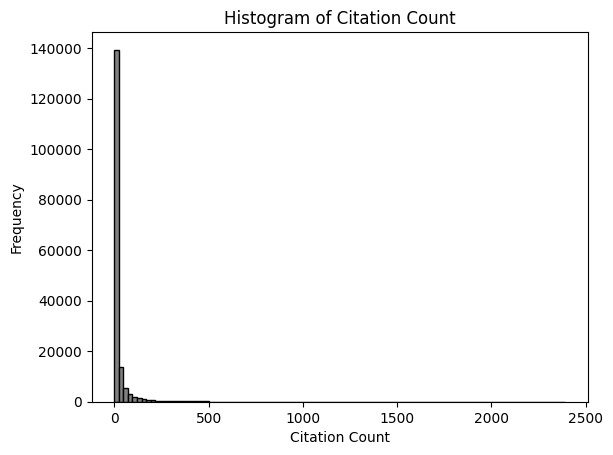

In [6]:
import matplotlib.pyplot as plt

# plot bar chart
plt.hist(df_rm_outlier['citationCount'], bins=100, color='gray', edgecolor='black')
plt.xlabel('Citation Count')
plt.ylabel('Frequency')
plt.title('Histogram of Citation Count')
plt.show()

In [10]:
df_rm_outlier['citationCount'].describe()

count   170902.00
mean        25.85
std         99.05
min          0.00
25%          1.00
50%          4.00
75%         15.00
max       2392.00
Name: citationCount, dtype: float64

In [11]:
# bin ['[0, 10)', '[10, 100)', '[100, +inf)']
bins = [0, 10, 100, np.inf]

# label encoding to multi-class labels
labels = ['0', '1', '2']

# bin the data and count occurrences in each bin
df_rm_outlier['citationCountBin'] = pd.cut(df_rm_outlier['citationCount'], bins=bins, labels=labels, right=False)
bin_counts = df_rm_outlier['citationCountBin'].value_counts(sort=False)
bin_counts

<ipython-input-11-9b1d9000b66b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rm_outlier['citationCountBin'] = pd.cut(df_rm_outlier['citationCount'], bins=bins, labels=labels, right=False)


0    114451
1     47598
2      8853
Name: citationCountBin, dtype: int64

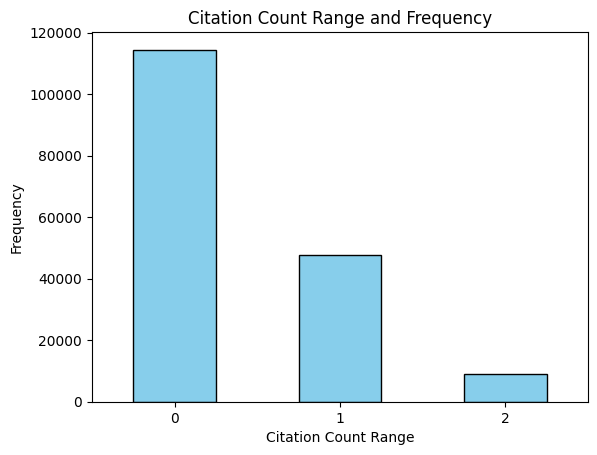

In [8]:
# plot bar chart of citationCountRange (Binned)
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Citation Count Range')
plt.ylabel('Frequency')
plt.title('Citation Count Range and Frequency')
plt.xticks(rotation=0, ha='center')

plt.show()

In [9]:
# write final input for modeling to file
df_rm_outlier.to_csv(base_path + 'filtered_corpusid_input.csv', index=False)